# Diabetes data set: Biostatistical Project

In [1]:
# Load packages
library(tidyr)
library(psych)
library(imputeMissings)
library(caret)
theme_set(theme_bw())

Warning message:
"package 'tidyr' was built under R version 3.6.3"
Warning message:
"package 'psych' was built under R version 3.6.3"
Warning message:
"package 'imputeMissings' was built under R version 3.6.3"
Warning message:
"package 'caret' was built under R version 3.6.3"
Loading required package: lattice

Loading required package: ggplot2

Warning message:
"package 'ggplot2' was built under R version 3.6.3"

Attaching package: 'ggplot2'


The following objects are masked from 'package:psych':

    %+%, alpha




In [2]:
# Read in data
data <- read.csv("http://biostat.mc.vanderbilt.edu/wiki/pub/Main/DataSets/diabetes.csv")
head(data)

,id,chol,stab.glu,hdl,ratio,glyhb,location,age,gender,height,weight,frame,bp.1s,bp.1d,bp.2s,bp.2d,waist,hip,time.ppn
,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<fct>,<int>,<fct>,<int>,<int>,<fct>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,1000,203,82,56,3.6,4.31,Buckingham,46,female,62,121,medium,118,59,NA,NA,29,38,720
2,1001,165,97,24,6.9,4.44,Buckingham,29,female,64,218,large,112,68,NA,NA,46,48,360
3,1002,228,92,37,6.2,4.64,Buckingham,58,female,61,256,large,190,92,185,92,49,57,180
4,1003,78,93,12,6.5,4.63,Buckingham,67,male,67,119,large,110,50,NA,NA,33,38,480
5,1005,249,90,28,8.9,7.72,Buckingham,64,male,68,183,medium,138,80,NA,NA,44,41,300
6,1008,248,94,69,3.6,4.81,Buckingham,34,male,71,190,large,132,86,NA,NA,36,42,195


In [3]:
# Create categorical diagnosis
data$diabetes <- as.factor(ifelse(data$glyhb>7,"yes","no"))

# Remove those with uncertain diagnosis
data_missing_diag <- subset(data,is.na(diabetes)==TRUE)
data <- subset(data,is.na(diabetes)==FALSE)

### Descriptive statistics

In [4]:
# Descriptives: continuous variables
describe(data[c(2:6,8,10:11,13:19)])

,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
chol,1,389,207.275064,44.714950,203.00,204.290735,37.0650000,78.00,443.00,365.00,0.9508887,2.58740526,2.26713794
stab.glu,2,390,107.338462,53.798188,90.00,95.032051,17.7912000,48.00,385.00,337.00,2.6903022,7.73431272,2.72417715
hdl,3,389,50.267352,17.301317,46.00,48.325879,14.8260000,12.00,120.00,108.00,1.2178258,2.04136970,0.87721157
ratio,4,389,4.526478,1.738480,4.20,4.360383,1.6308599,1.50,19.30,17.80,2.2236862,13.24995688,0.08814443
glyhb,5,390,5.589769,2.242595,4.84,5.111410,0.8302559,2.68,16.11,13.43,2.2288764,4.98480242,0.11355820
age,6,390,46.774359,16.435911,44.50,46.105769,20.0151000,19.00,92.00,73.00,0.3303502,-0.68196799,0.83226473
height,7,385,65.984416,3.925712,66.00,65.948220,4.4478000,52.00,76.00,24.00,0.0167729,-0.22853516,0.20007281
weight,8,389,177.349614,40.443560,173.00,174.501597,37.0650000,99.00,325.00,226.00,0.7385736,0.72015709,2.05056991
bp.1s,9,385,137.148052,22.997427,136.00,135.087379,20.7564000,90.00,250.00,160.00,1.0828997,2.25686505,1.17205743


In [5]:
# Descriptives: categorical variables
lapply(data[c(7,9,12,20)], function(x) table(x))

$location
x
Buckingham     Louisa 
       190        200 

$gender
x
female   male 
   228    162 

$frame
x
        large medium  small 
    11     99    178    102 

$diabetes
x
 no yes 
330  60 


Warning message:
"Removed 530 rows containing non-finite values (stat_bin)."


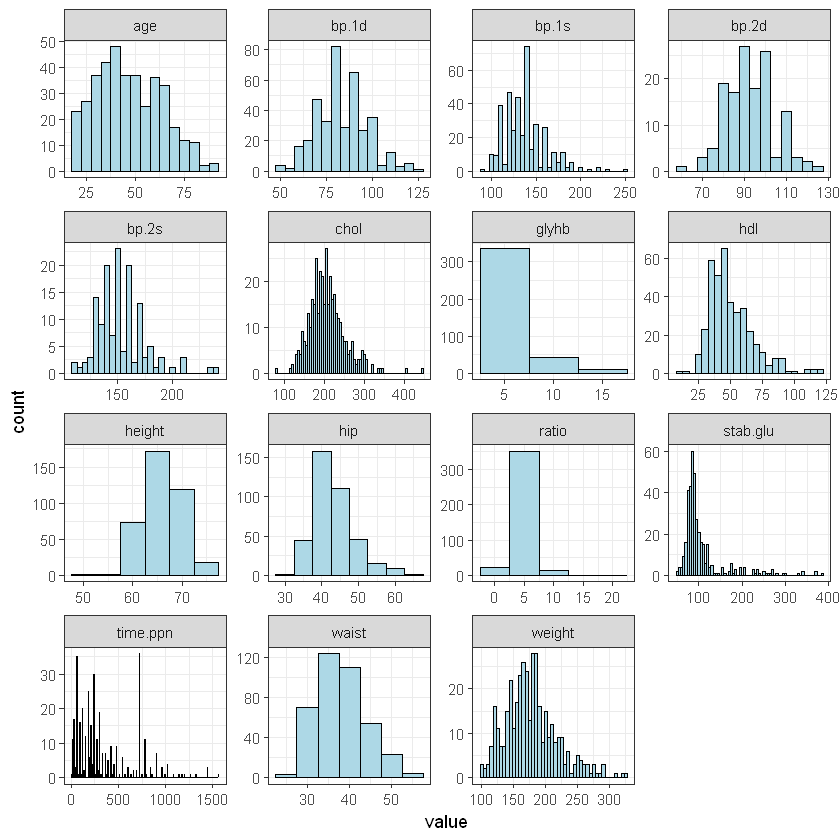

In [6]:
# View distributions of continuous variables
ggplot(gather(data[c(2:6,8,10:11,13:19)], cols, value), aes(x = value)) + 
  geom_histogram(binwidth = 5,fill="light blue",color="black") + 
  facet_wrap(.~cols,scales="free")

Warning message:
"attributes are not identical across measure variables;
they will be dropped"


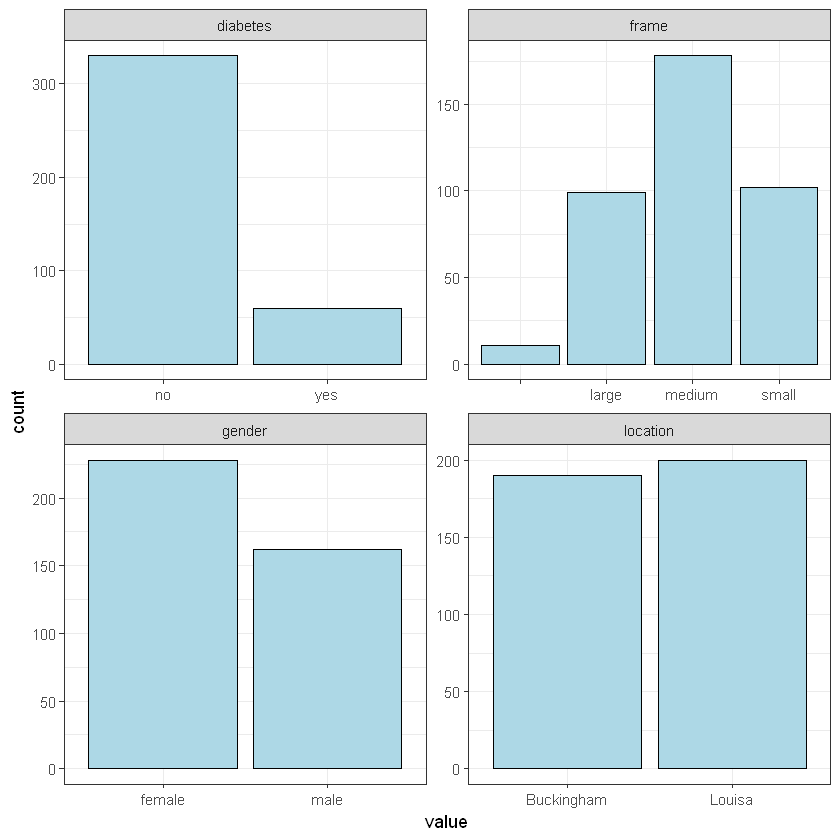

In [7]:
# View distributions of categorical variables
ggplot(gather(data[c(7,9,12,20)], cols, value), aes(x = value)) + 
  geom_bar(fill="light blue",color="black") + facet_wrap(.~cols,scales="free")

### Handling missing data

In [8]:
# Look at number of NA per column
sapply(data, function(y) sum(length(which(is.na(y)))))

id     chol stab.glu      hdl    ratio    glyhb location      age 
       0        1        0        1        1        0        0        0 
  gender   height   weight    frame    bp.1s    bp.1d    bp.2s    bp.2d 
       0        5        1        0        5        5      252      252 
   waist      hip time.ppn diabetes 
       2        2        3        0

In [9]:
# Impute missing values with medians
data_imputed <- data %>% 
  dplyr::mutate_at(vars(chol,hdl,ratio,height,weight,bp.1s,bp.1d,waist,hip,time.ppn), 
            ~ifelse(is.na(.), median(., na.rm = TRUE), .))
sapply(data_imputed, function(y) sum(length(which(is.na(y)))))

id     chol stab.glu      hdl    ratio    glyhb location      age 
       0        0        0        0        0        0        0        0 
  gender   height   weight    frame    bp.1s    bp.1d    bp.2s    bp.2d 
       0        0        0        0        0        0      252      252 
   waist      hip time.ppn diabetes 
       0        0        0        0

### Differences by diagnosis

In [10]:
# Get long form data
data_imputed$glyhb <- NULL
data_continuous <- data_imputed[c(1:5,7,9,10,12:19)]
data_long <- gather(data_continuous, feature, value, chol:time.ppn, factor_key=TRUE)

Warning message:
"Removed 504 rows containing non-finite values (stat_bin)."


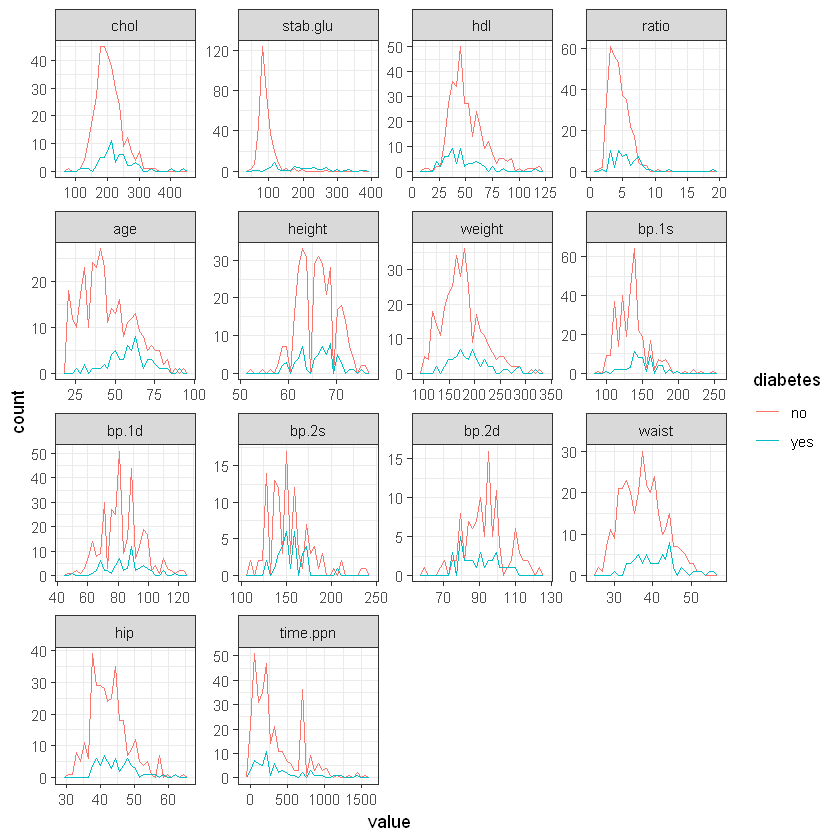

In [11]:
# Plot features by diabetes
ggplot(data_long,aes(x=value,color=diabetes))+
  geom_freqpoly(bins=30)+
  facet_wrap(~feature,scales="free")

### Running inferential statistics

Differences will be compared between patients with diabetes and patients without diabetes.

Categorical variables will be compared using Fisher's Exact Tests.
Continuous variables will be compared using Wilcoxon Rank Sum Tests.

In [12]:
# Function: run either a Fisher's Exact Test or a Wilcoxon Rank Sum Test
report_p_values <- function(x,y) {
  variable <- NULL
  for(i in 1:ncol(x)){
    if(is.factor(x[,i])){
      variable[[i]] <- fisher.test(table(x[,i],y))$p.value
    } else {
      variable[[i]] <- wilcox.test(x[,i] ~ y)$p.value
    }
  }
  names(variable) <- colnames(x)
  return(round(variable,4))
}

report_p_values(data_imputed[2:18],data_imputed$diabetes)

chol stab.glu      hdl    ratio location      age   gender   height 
  0.0002   0.0000   0.0047   0.0000   0.6745   0.0000   0.7772   0.6625 
  weight    frame    bp.1s    bp.1d    bp.2s    bp.2d    waist      hip 
  0.0013   0.0345   0.0000   0.2531   0.1556   0.1532   0.0000   0.0038 
time.ppn 
  0.3841

### Logistic regression

In [13]:
# Full model
full.model <- glm(diabetes ~., data = data_imputed, family = binomial)
coef(full.model)

(Intercept)             id           chol       stab.glu            hdl 
 -2.460872e+01  -2.088714e-05   4.185558e-02   1.102380e-01  -4.085160e-02 
         ratio locationLouisa            age     gendermale         height 
 -5.304166e-01   5.295822e-01   5.280379e-02  -2.391847e+00  -4.453371e-02 
        weight     framelarge    framemedium     framesmall          bp.1s 
  6.545318e-02   6.212316e+00   6.828552e+00   6.528146e+00   1.392816e-02 
         bp.1d          bp.2s          bp.2d          waist            hip 
 -6.182142e-02  -2.028514e-02   1.305796e-01  -8.153060e-02  -3.290302e-01 
      time.ppn 
  2.421020e-03

In [14]:
# Make predictions
probabilities <- full.model %>% predict(data_imputed, type = "response")
predicted.classes <- ifelse(probabilities > 0.5,1,0)
# Prediction accuracy
observed.classes <- data_imputed$diabetes
mean(predicted.classes == observed.classes)

[1] NA

In [15]:
# Stepwise model
library(MASS)
step.model <- full.model %>% stepAIC(trace = FALSE)
coef(step.model)

ERROR: Error in stepAIC(., trace = FALSE): number of rows in use has changed: remove missing values?


In [ ]:
# Make predictions
probabilities <- predict(step.model, data_imputed, type = "response")
predicted.classes <- ifelse(probabilities > 0.5, 1, 0)
# Prediction accuracy
observed.classes <- data_imputed$diabetes
mean(predicted.classes == observed.classes)

Conclusion: final prediction model will use stepwise model, since accuracy is not affected

In [ ]:
# Final analysis: use previously missing data as test data
summary(data_missing_diag)
data_missing_diag <- data_missing_diag[c(2:5,7:14,17:20)]

In [16]:
# Predict diagnosis
probabilities <- predict(step.model, data_missing_diag, type = "response")
predicted.classes <- ifelse(probabilities > 0.5, 1, 0)
predicted.classes

ERROR: Error in predict(step.model, data_missing_diag, type = "response"): object 'step.model' not found


Conclusion: for the patients with missing data, they are likely non-diabetic

### Compare BP changes from time 1 to time 2

In [17]:
# Create effect size measurement for Wilcoxon test
rFromWilcox<-function(wilcoxModel,N) {
  z<-qnorm(wilcoxModel$p.value/2)
  r<-z/sqrt(N)
  cat(wilcoxModel$data.name,"Effect Size, r=",r)
}

Warning message:
"Removed 252 rows containing missing values (geom_point)."


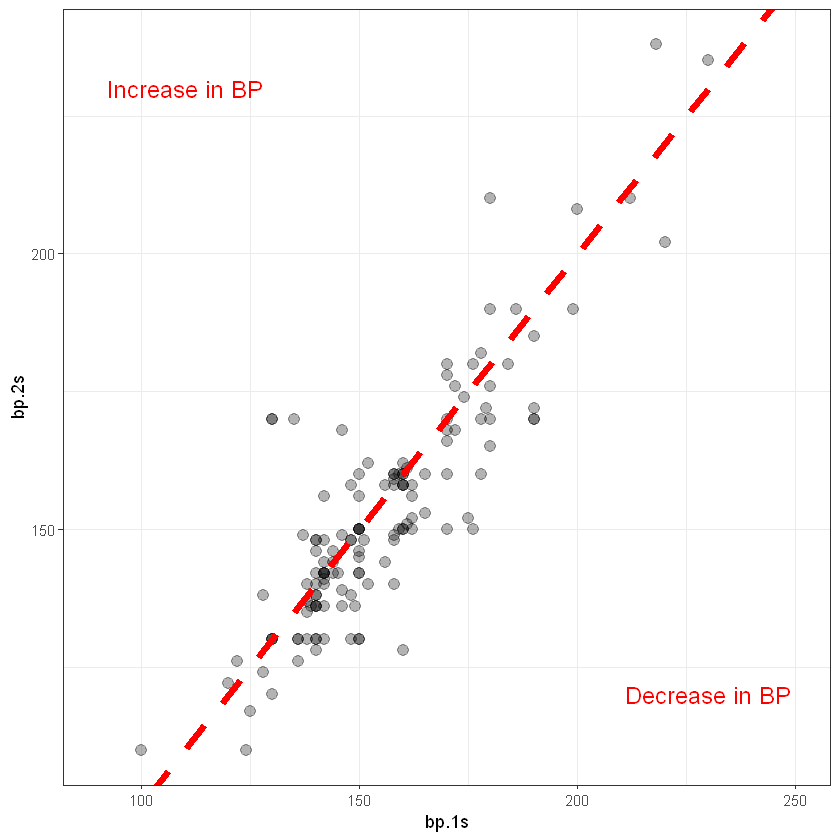

In [18]:
# Systolic blood pressure change from time 1 to time 2
ggplot(data,aes(x=bp.1s,y=bp.2s))+
  geom_point(size=3,alpha=.3)+
  annotate(geom="text",x=110,y=230,label="Increase in BP",color="red",size=5)+
  annotate(geom="text",x=230,y=120,label="Decrease in BP",color="red",size=5)+
  geom_abline(intercept=0,slope=1,linetype="dashed",color="red",size=2)

In [19]:
x <- wilcox.test(data$bp.1s,data$bp.2s,paired=TRUE)
N <- nrow(subset(data,data$bp.1s>0 & data$bp.2s>0))
cat("P value: ", x$p.value, "   ")
rFromWilcox(x,N)

P value:  0.0004770713    data$bp.1s and data$bp.2s Effect Size, r= -0.2973703

Conclusion: There was a change in systolic BP from time 1 to time 2 

Warning message:
"Removed 252 rows containing missing values (geom_point)."


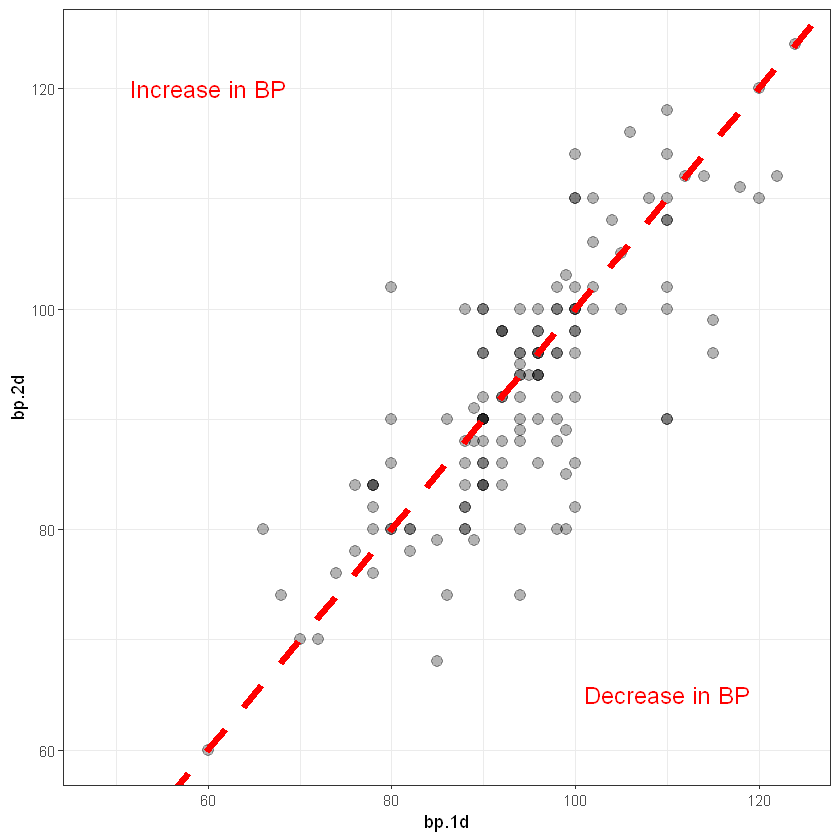

In [20]:
# Diastolic blood pressure change from time 1 to time 2
ggplot(data,aes(x=bp.1d,y=bp.2d))+
  geom_point(size=3,alpha=.3)+
  annotate(geom="text",x=60,y=120,label="Increase in BP",color="red",size=5)+
  annotate(geom="text",x=110,y=65,label="Decrease in BP",color="red",size=5)+
  geom_abline(intercept=0,slope=1,linetype="dashed",color="red",size=2)

In [21]:
# Compare a change in diastolic BP
x <- wilcox.test(data$bp.1d,data$bp.2d,paired=TRUE)
N <- nrow(subset(data,data$bp.1d>0 & data$bp.2d>0))
cat("P value: ", x$p.value, "   ")
rFromWilcox(x,N)

P value:  0.03584831    data$bp.1d and data$bp.2d Effect Size, r= -0.1786484

Conclusion: There was a small change in diastolic BP from time 1 to time 2